<a href="https://colab.research.google.com/github/Arghadeeps07/Arghadeeps07/blob/main/PerceptronAIHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
 XYZ company is the manufacturer of electrical fans (ceiling fans, table fans) and has pan-India presence. The company sales to the final consumers through thousands of dealers spread across all major towns in India. The company has 4 regional warehouses which cater to 4 different regions (North, East, South, West) in India. The dealers place order to the region-specific warehouse, which is fulfilled by the inventory available at the point of receiving the order. The warehouse manager must forecast demand from dealers one month in advance. The company in recent times has been facing serious challenges in terms of high inventory and low fill rate across all warehouses. The company has identified poor forecasting accuracy as the primary challenge for poor inventory management. The company wants to improve forecast accuracy by introducing advanced Time Series forecasting methods as well ML algorithms. The company also wants to enhance forecast accuracy by incorporating external data with the internal sales data.
  
**Assignment:**
 Monthly Sales data by SKU by warehouse is available between April 2018 and May 2021. The task is to predict sales by SKU by Warehouse for the month of June 2021. You are free to use external data as found suitable to improve the forecast accuracy. We will use Mean Absolute Percentage Error (MAPE) as the metric for determining forecast accuracy. The formula of MAPE is given below:

MAPE = ABS(Actual Sales - Forecasted Sales) / Actual Sales, if Actual Sales > 0

                0%, if Actual Sales and Forecasted Sales are both 0
                100%, if Actual Sales =0 and Forecasted Sales <> 0


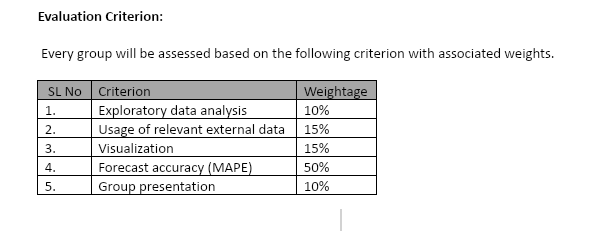

In [ ]:
# Importing Necessary Tools and Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings

# Ignoring Warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Step 1: Load Data
file_path = "/content/PerceptronDataSET.xlsx"  # Dataset path
submission_file_path = "/content/Submission Format.xlsx"  # Submission format file
output_file_path = "/content/Arghadeep Sarkar.csv"  # Output file path

data = pd.read_excel(file_path)

In [ ]:
# Step 2: Reshape Data
data_long = data.melt(
    id_vars=['Warehouse id', 'Region', 'SKU id'],
    var_name='Month-Year',
    value_name='Sales'
)

# Convert 'Month-Year' column to datetime format
data_long['Month-Year'] = pd.to_datetime(data_long['Month-Year'], errors='coerce')

# Handle invalid dates
if data_long['Month-Year'].isnull().sum() > 0:
    print("Invalid dates found. Please check:")
    print(data_long[data_long['Month-Year'].isnull()])

# Handle missing sales values
data_long['Sales'] = data_long['Sales'].fillna(0)

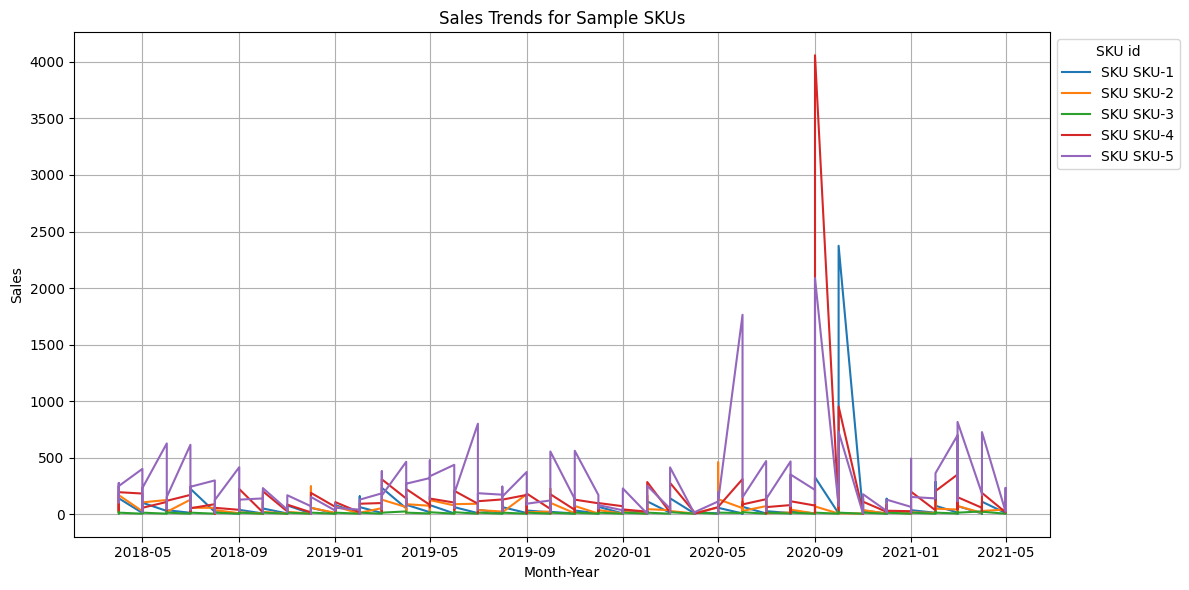

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
sample_skus = data_long['SKU id'].unique()[:5]  # Select the first 5 SKUs
sample_data = data_long[data_long['SKU id'].isin(sample_skus)]

plt.figure(figsize=(12, 6))
for sku in sample_skus:
    sku_data = sample_data[sample_data['SKU id'] == sku]
    plt.plot(sku_data['Month-Year'], sku_data['Sales'], label=f"SKU {sku}")

plt.title('Sales Trends for Sample SKUs')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.legend(title='SKU id', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Train-Test Split
train_data = data_long[data_long['Month-Year'] < pd.Timestamp('2021-05-01')]
test_data = data_long[data_long['Month-Year'] >= pd.Timestamp('2021-05-01')]

In [ ]:
# Step 5: Time Series Forecasting (Using SARIMA)
results = {}
for sku in data_long['SKU id'].unique():
    sku_train = train_data[train_data['SKU id'] == sku].set_index('Month-Year')['Sales']
    sku_test = test_data[test_data['SKU id'] == sku].set_index('Month-Year')['Sales']

    if len(sku_train) > 0:  # Ensure training data exists
        try:
            # Use SARIMA for seasonality
            model = SARIMAX(sku_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
            model_fit = model.fit(disp=False)

            # Forecast for the test period
            forecast = model_fit.forecast(steps=len(sku_test))
            results[sku] = {
                'forecast': forecast,
                'actual': sku_test
            }

            # Calculate MAPE for each SKU
            if len(forecast) == len(sku_test):
                mape = mean_absolute_percentage_error(sku_test, forecast)
                print(f"SKU: {sku}, MAPE: {mape:.2f}%")
        except Exception as e:
            print(f"Error for SKU {sku}: {e}")
    else:
        print(f"Insufficient training data for SKU {sku}")

SKU: SKU-1, MAPE: 3.49%
SKU: SKU-2, MAPE: 0.46%
SKU: SKU-3, MAPE: 1.22%
SKU: SKU-4, MAPE: 2.86%
SKU: SKU-5, MAPE: 5.56%
SKU: SKU-6, MAPE: 1.71%
Error for SKU SKU-7: LU decomposition error.
SKU: SKU-8, MAPE: 1.66%
SKU: SKU-9, MAPE: 6.78%
SKU: SKU-10, MAPE: 2.90%
SKU: SKU-11, MAPE: 1.24%
SKU: SKU-12, MAPE: 0.05%
SKU: SKU-13, MAPE: 19.04%
SKU: SKU-14, MAPE: 4.31%
SKU: SKU-15, MAPE: 0.33%
SKU: SKU-16, MAPE: 0.12%
SKU: SKU-17, MAPE: 23.19%
SKU: SKU-18, MAPE: 1.37%
SKU: SKU-19, MAPE: 1.29%
SKU: SKU-20, MAPE: 6.61%
SKU: SKU-21, MAPE: 0.35%
SKU: SKU-22, MAPE: 4.85%
SKU: SKU-23, MAPE: 1.46%
SKU: SKU-24, MAPE: 6.47%
SKU: SKU-25, MAPE: 1.13%
SKU: SKU-26, MAPE: 1.38%
SKU: SKU-27, MAPE: 0.88%
SKU: SKU-28, MAPE: 4.57%
SKU: SKU-29, MAPE: 1.97%
SKU: SKU-30, MAPE: 5.71%
SKU: SKU-31, MAPE: 2.24%
SKU: SKU-32, MAPE: 2.83%
SKU: SKU-33, MAPE: 2.29%
SKU: SKU-34, MAPE: 2.21%
SKU: SKU-35, MAPE: 7.62%
SKU: SKU-36, MAPE: 0.72%
SKU: SKU-37, MAPE: 1.38%
SKU: SKU-38, MAPE: 0.54%
SKU: SKU-39, MAPE: 1.30%
SKU: SKU-40

In [ ]:
# Step 6: Evaluate Model Performance
mape_values = [mean_absolute_percentage_error(res['actual'], res['forecast']) for res in results.values() if len(res['actual']) == len(res['forecast'])]
overall_mape = np.mean(mape_values)
print(f"Overall MAPE: {overall_mape:.2f}%")

Overall MAPE: 6.20%


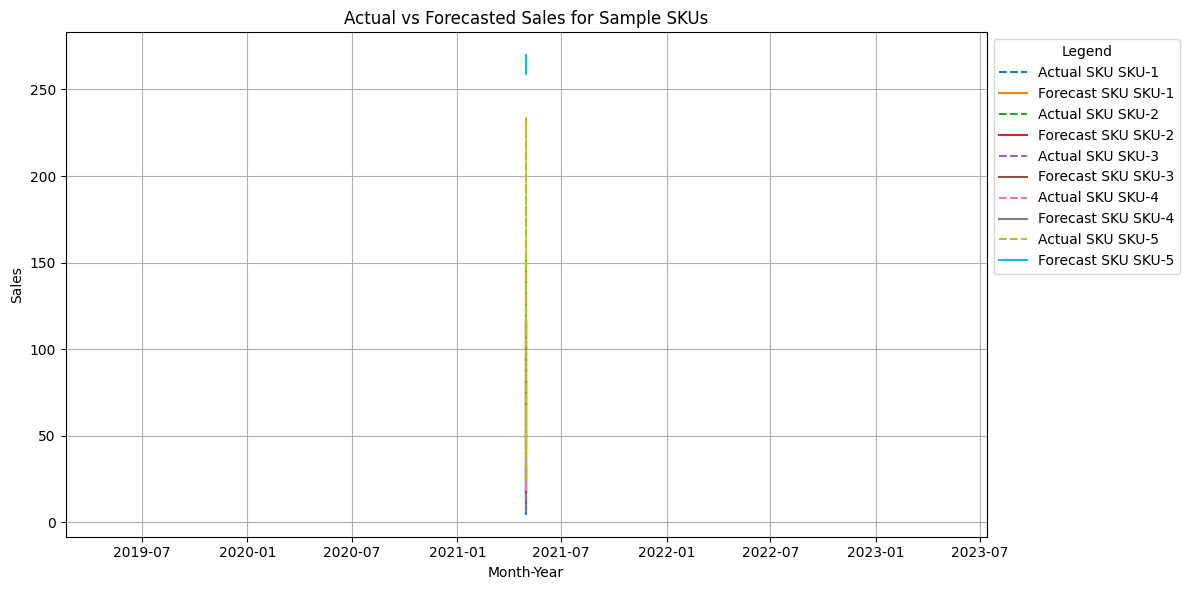

In [ ]:
# Step 7: Visualization of Forecast vs Actual
plt.figure(figsize=(12, 6))
for sku in sample_skus:
    if sku in results:
        actual = results[sku]['actual']
        forecast = results[sku]['forecast'][:len(actual)]

        plt.plot(actual.index, actual.values, label=f"Actual SKU {sku}", linestyle='--')
        plt.plot(actual.index, forecast.values, label=f"Forecast SKU {sku}")

plt.title('Actual vs Forecasted Sales for Sample SKUs')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 8: Update Submission Excel Sheet with Forecast for Jun-21
submission_df = pd.read_excel(submission_file_path)
forecast_column = "Jun-21"

for index, row in submission_df.iterrows():
    sku = row['SKU id']
    if sku in results:
        forecast = results[sku]['forecast']
        if len(forecast) > 0:
            submission_df.loc[index, forecast_column] = max(0, forecast.iloc[0])
        else:
            submission_df.loc[index, forecast_column] = 0
    else:
        submission_df.loc[index, forecast_column] = 0

In [ ]:
# Step 9: Remove Unwanted Columns
submission_df = submission_df.drop(columns=[pd.Timestamp('2021-06-01')], errors='ignore')

In [ ]:
# Step 10: Save Updated Submission File
submission_df.to_csv(output_file_path, index=False)
print(f"Updated CSV file generated successfully at: {output_file_path}")

Updated CSV file generated successfully at: /content/Arghadeep Sarkar.csv
